In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
import altair as alt # visualization
import statsmodels.api as sm
import itertools

In [2]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 100

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/airline-passenger-traffic.csv")

In [4]:
df.head(100)

,1949-01,112
0,1949-02,118.0
1,1949-03,132.0
2,1949-04,129.0
3,1949-05,121.0
4,1949-06,135.0
5,1949-07,148.0
6,1949-08,148.0
7,1949-09,136.0
8,1949-10,119.0
9,1949-11,104.0


In [5]:
df.shape

(143, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1949-01  143 non-null    object 
 1   112      139 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [7]:
df.isnull().sum()

1949-01    0
112        4
dtype: int64

## So the dataset did not have the columns names so i decided to assign column names i.e "year" and "Passengers"

In [8]:
df.rename(columns = {'1949-01' : 'year','112' : 'Passengers'},
                                     inplace = True)


In [9]:
df.head()

,year,Passengers
0,1949-02,118.0
1,1949-03,132.0
2,1949-04,129.0
3,1949-05,121.0
4,1949-06,135.0


## Removing the missing values

In [10]:
df["Passengers"]=df["Passengers"].replace(to_replace="0",value=np.nan) 
df["Passengers"]=df["Passengers"].astype(float)
mean=df["Passengers"].mean()
mean
mean=df["Passengers"].mean()
mean
df["Passengers"].replace(np.nan,mean,inplace=True)

In [11]:
df.isnull().sum()

year          0
Passengers    0
dtype: int64

## Splitting the year into month, week, day, day of week.

In [12]:
df.year = pd.to_datetime(df.year, format="%Y-%m-%d")
df["month"] = df.year.dt.month
df["week"] = df.year.dt.week
df["day"] = df.year.dt.day
df["day_of_week"] = df.year.dt.dayofweek
df.fillna(df.mean(), inplace=True)

df.set_index("year", drop=False, inplace=True)
df.head()

,year,Passengers,month,week,day,day_of_week
year,,,,,,
1949-02-01,1949-02-01,118.0,2,5,1,1
1949-03-01,1949-03-01,132.0,3,9,1,1
1949-04-01,1949-04-01,129.0,4,13,1,4
1949-05-01,1949-05-01,121.0,5,17,1,6
1949-06-01,1949-06-01,135.0,6,22,1,2


## checking the starting year and ending year. 

In [13]:
df['year'].min(),df['year'].max()

(Timestamp('1949-02-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

# Visualization

In [14]:

bars = alt.Chart(df).mark_trail(color='orange').encode(
    x = 'year:T',
    y = 'Passengers:Q',
).properties(
    title={
    "text":['Passengers'],
    "fontSize":15,
    "fontWeight": 'bold',
    "font":'Courier New',
    }
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
)   

(bars + text).properties( height=300, width=600)

alt.LayerChart(...)

In [15]:
# dataframe Moving Average for weeks 4, 16, 28, 40, 52 

df_ma = pd.DataFrame()
# Grouping the data week by week by taking its average.So there will be total 52 rows in the final list
df_ma['Passengers'] = df['Passengers'].resample('W').mean()

# calculating moving averge
df_ma['weeks_4'] = df_ma['Passengers'].rolling(window = 4, min_periods = 1).mean()
df_ma['weeks_16'] = df_ma['Passengers'].rolling(window = 16, min_periods = 1).mean()
df_ma['weeks_28'] = df_ma['Passengers'].rolling(window = 28, min_periods = 1).mean()
df_ma['weeks_40'] = df_ma['Passengers'].rolling(window = 40, min_periods = 1).mean()
df_ma['weeks_52'] = df_ma['Passengers'].rolling(window = 52, min_periods = 1).mean()

df_ma

,Passengers,weeks_4,weeks_16,weeks_28,weeks_40,weeks_52
year,,,,,,
1949-02-06,118.00000,118.00000,118.000000,118.000000,118.000000,118.000000
1949-02-13,NaN,118.00000,118.000000,118.000000,118.000000,118.000000
1949-02-20,NaN,118.00000,118.000000,118.000000,118.000000,118.000000
1949-02-27,NaN,118.00000,118.000000,118.000000,118.000000,118.000000
1949-03-06,132.00000,132.00000,125.000000,125.000000,125.000000,125.000000
1949-03-13,NaN,132.00000,125.000000,125.000000,125.000000,125.000000
1949-03-20,NaN,132.00000,125.000000,125.000000,125.000000,125.000000
1949-03-27,NaN,132.00000,125.000000,125.000000,125.000000,125.000000
1949-04-03,129.00000,129.00000,126.333333,126.333333,126.333333,126.333333


In [16]:
# set base for creat custom legend and plots
base = alt.Chart(df_ma.reset_index()).transform_calculate(
legend1="'Passengers'",
legend2="'MA of weeks 4'",
legend3="'MA of weeks 16'",
legend4="'MA of weeks 28'",
legend5="'MA of weeks 40'",
legend6="'MA of weeks 52'"
)
scale = alt.Scale(domain=["Passengers", 
                          "MA of weeks 4",
                          "MA of weeks 16",
                          "MA of weeks 28",
                          "MA of weeks 40",
                          "MA of weeks 52"], 
                  range=['blue', 
                         'gold', 
                         'darkgreen', 
                         'slategray', 
                         'deeppink',
                         'firebrick'])

line1 = base.mark_line(color='blue').encode(
x = 'year:T',
y = 'Passengers:Q',
color=alt.Color('legend1:N', scale=scale, title=''),
)

line2 = base.mark_line(color='gold').encode(
x = 'year:T',
y = 'weeks_4:Q',
color=alt.Color('legend2:N', scale=scale, title='')
)

line3 = base.mark_line(color='darkgreen').encode(
x = 'year:T',
y = 'weeks_16:Q',
color=alt.Color('legend3:N', scale=scale, title='')
)

line4 = base.mark_line(color='slategray').encode(
x = 'year:T',
y = 'weeks_28:Q',
color=alt.Color('legend4:N', scale=scale, title='')
)


line5 = base.mark_line(color='deeppink').encode(
x = 'year:T',
y = 'weeks_40:Q',
color=alt.Color('legend5:N', scale=scale, title='')
)

line6 = base.mark_line(color='firebrick').encode(
x = 'year:T',
y = 'weeks_52:Q',
color=alt.Color('legend6:N', scale=scale, title='')
)

text = line1.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
)   


(line1 + line2 + line3 + line4 + line5 + line6 +text).properties(
    title={"text":['Moving Average Plot of Stock Over the Weeks'],
           "fontSize":15,
           "fontWeight": 'bold',
           "font":'Courier New',},
    height=500, width=600
).interactive()


alt.LayerChart(...)

In [17]:
y=df['Passengers'].resample('MS').mean()

In [18]:
y

year
1949-02-01    118.00000
1949-03-01    132.00000
1949-04-01    129.00000
1949-05-01    121.00000
1949-06-01    135.00000
1949-07-01    148.00000
1949-08-01    148.00000
1949-09-01    136.00000
1949-10-01    119.00000
1949-11-01    104.00000
1949-12-01    118.00000
1950-01-01    115.00000
1950-02-01    126.00000
1950-03-01    141.00000
1950-04-01    135.00000
1950-05-01    125.00000
1950-06-01    149.00000
1950-07-01    170.00000
1950-08-01    170.00000
1950-09-01    158.00000
1950-10-01    133.00000
1950-11-01    114.00000
1950-12-01    140.00000
1951-01-01    145.00000
1951-02-01    150.00000
1951-03-01    178.00000
1951-04-01    163.00000
1951-05-01    172.00000
1951-06-01    281.94964
1951-07-01    281.94964
1951-08-01    199.00000
1951-09-01    184.00000
1951-10-01    162.00000
1951-11-01    146.00000
1951-12-01    166.00000
1952-01-01    171.00000
1952-02-01    180.00000
1952-03-01    193.00000
1952-04-01    181.00000
1952-05-01    183.00000
1952-06-01    218.00000
1952-07-01 

In [19]:
y.isnull().sum()

0

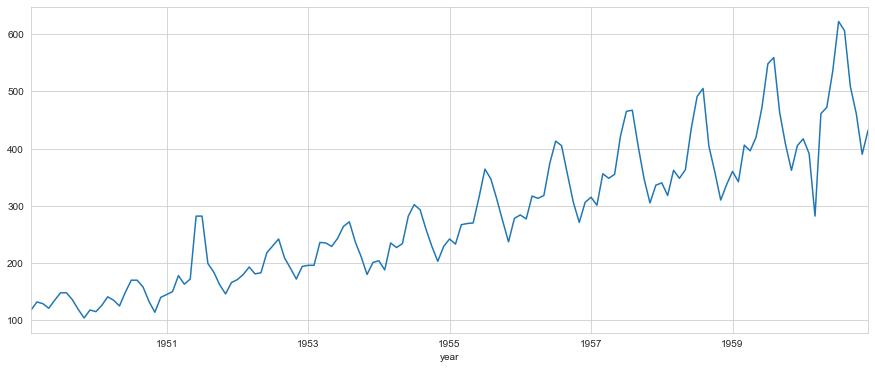

In [20]:
y.plot(figsize=(15,6))
plt.show()

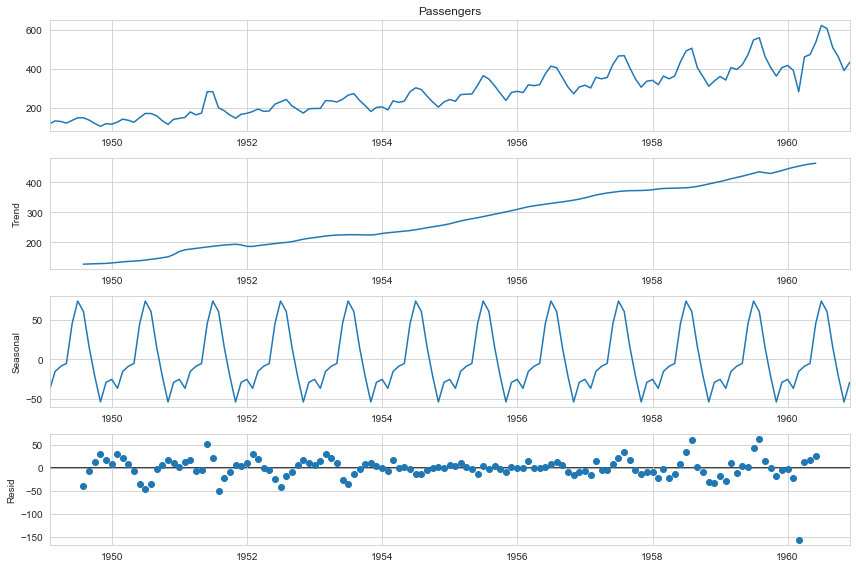

In [21]:
from pylab import rcParams

rcParams['figure.figsize']=12,8

decomposition=sm.tsa.seasonal_decompose(y,model='additive')

fig=decomposition.plot()

plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
from pandas import Series
result=adfuller(y)
print('ADF Statistic: %f' % result[0])
print('P-value: %f' % result[1])
print('Critical Values:')
for key,value in result[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: 0.848855
P-value: 0.992385
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [24]:
# ARIMA.

p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12)for x in list(itertools.product(p,d,q))]
print("Examples of parameter combinations for seasonal ARIMA...")
print("SARIMA: {} x {}".format(pdq[1],seasonal_pdq[1]))
print("SARIMA: {} x {}".format(pdq[1],seasonal_pdq[2]))
print("SARIMA: {} x {}".format(pdq[1],seasonal_pdq[3]))
print("SARIMA: {} x {}".format(pdq[1],seasonal_pdq[4]))

Examples of parameter combinations for seasonal ARIMA...
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 0, 1) x (0, 1, 1, 12)
SARIMA: (0, 0, 1) x (1, 0, 0, 12)


In [25]:
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param,
seasonal_order=param_seasonal,                                          
enforce_stationarity = False,
enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}x{}12 - ATC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - ATC:2031.0139437311377
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - ATC:1734.2431069182956
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - ATC:1338.2390885811487
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - ATC:1208.9963052875382
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - ATC:1245.8497752928183
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - ATC:1223.3950908582297
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - ATC:1203.5494673404874
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - ATC:1148.9590982031334
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - ATC:1845.2370706911415
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - ATC:1580.5597991806194
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - ATC:1270.6940316866333
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - ATC:1157.107015111067
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - ATC:1227.3262462929756


C:\Users\phili\anaconda3\anaco\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - ATC:1198.4441196547796
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - ATC:1170.087575654184
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - ATC:1124.6843338368394
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - ATC:1440.4694293858347
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - ATC:1280.3713644094123
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - ATC:1239.4738799855047
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - ATC:1125.574097312567
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - ATC:1247.3039048260475
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - ATC:1232.737184931428
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - ATC:1138.121241347166
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - ATC:1127.6496434921303
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - ATC:1428.5791486358864
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - ATC:1273.2961387154446
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - ATC:1205.0428846215407
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - ATC:1093.312979050026
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - ATC:1224.1819388303325
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - ATC:1185.4157555938414
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - ATC:1109.11126591256

In [26]:
df=sm.tsa.statespace.SARIMAX(y,order=(1,1,1),seasonal_order=(1,1,1,12),enforce_invertibility=False)
results=df.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3860      0.052      7.474      0.000       0.285       0.487
ma.L1         -0.9565      0.068    -14.074      0.000      -1.090      -0.823
ar.S.L12      -0.0541      0.345     -0.157      0.875      -0.730       0.622
ma.S.L12      -0.3507      0.358     -0.978      0.328      -1.053       0.352
sigma2       560.7109     35.715     15.699      0.000     490.710     630.712


# Forecasting the no.of passengers travelling after 1960.

            lower Passengers  upper Passengers
1961-01-01        400.174604        492.996027
1961-02-01        373.487962        474.511125
1961-03-01        331.073846        433.949130
1961-04-01        433.134130        536.654910
1961-05-01        447.505588        551.374443
1961-06-01        508.250772        612.377267
1961-07-01        587.128001        691.480647
1961-08-01        581.573916        686.140864
1961-09-01        485.783579        590.560092
1961-10-01        436.230115        541.214131
1961-11-01        375.564722        480.755198
1961-12-01        415.865201        521.261491
1962-01-01        421.696561        543.891826
1962-02-01        396.991182        522.890788
1962-03-01        351.168616        478.369558
1962-04-01        457.328640        585.238858
1962-05-01        471.413536        599.852138
1962-06-01        532.168145        661.071681
1962-07-01        611.370327        740.714560
1962-08-01        605.137376        734.912276
1962-09-01   

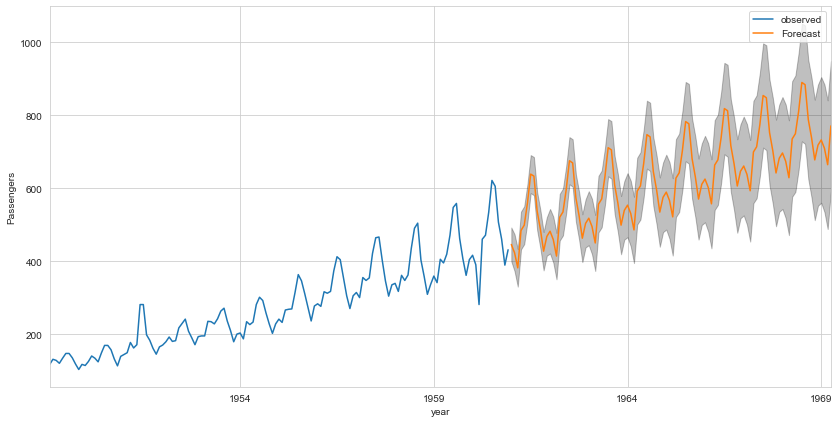

In [27]:
pred_uc=results.get_forecast(steps=100)
pred_ci=pred_uc.conf_int()
ax=y.plot(label="observed",figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label="Forecast")
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color="k",alpha=.25)
ax.set_xlabel("year")
ax.set_ylabel("Passengers")
print(pred_ci)
plt.legend()
plt.show()